In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score
import pickle

In [5]:
with open('/home/mattyshen/DistillationEdit/results/figs_stability/stafigs_seed1_nbootstraps20.p', 'rb') as fp:
    data1 = pickle.load(fp)

In [6]:
with open('/home/mattyshen/DistillationEdit/results/figs_stability/stafigs_seed2_nbootstraps20.p', 'rb') as fp:
    data2 = pickle.load(fp)

In [7]:
with open('/home/mattyshen/DistillationEdit/results/figs_stability/stafigs_seed3_nbootstraps20.p', 'rb') as fp:
    data3 = pickle.load(fp)

In [9]:
sorted1 = sorted([(k, data1[k]) for k in data1.keys()], key= lambda x: x[1])[::-1]
sorted2 = sorted([(k, data2[k]) for k in data2.keys()], key= lambda x: x[1])[::-1]
sorted3 = sorted([(k, data3[k]) for k in data3.keys()], key= lambda x: x[1])[::-1]


In [42]:
sorted1[:5]

[(frozenset({'c36', 'c44'}), 18),
 (frozenset({'c44', 'c73'}), 18),
 (frozenset({'c109', 'c31'}), 15),
 (frozenset({'c52', 'c80'}), 14),
 (frozenset({'c78'}), 12)]

In [44]:
sorted2[:5]

[(frozenset({'c17', 'c90'}), 17),
 (frozenset({'c109', 'c31'}), 17),
 (frozenset({'c73', 'c75'}), 14),
 (frozenset({'c63', 'c75'}), 12),
 (frozenset({'c5', 'c62', 'c94'}), 12)]

In [45]:
sorted3[:5]

[(frozenset({'c44', 'c73'}), 19),
 (frozenset({'c30', 'c44'}), 19),
 (frozenset({'c52', 'c80'}), 15),
 (frozenset({'c44', 'c75'}), 13),
 (frozenset({'c17', 'c97'}), 13)]

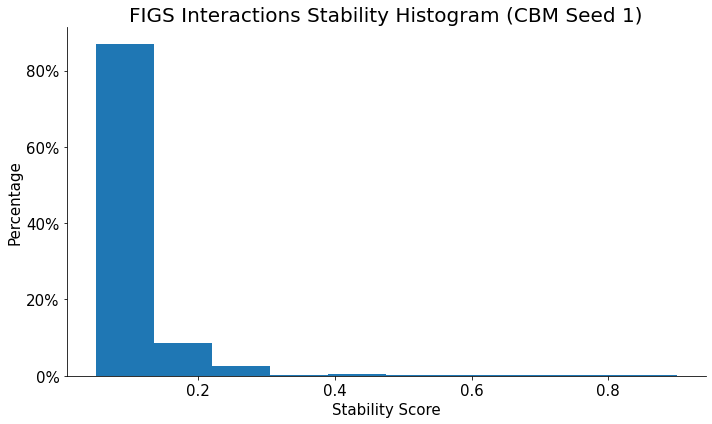

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(10, 6))
plt.hist([x[1]/20 for x in sorted1], weights=np.ones(len(sorted1)) / len(sorted1))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Stability Score')
plt.ylabel('Percentage')
plt.title('FIGS Interactions Stability Histogram (CBM Seed 1)')
plt.tight_layout()
plt.savefig(f'../figures/stability/seed1_hist.png')

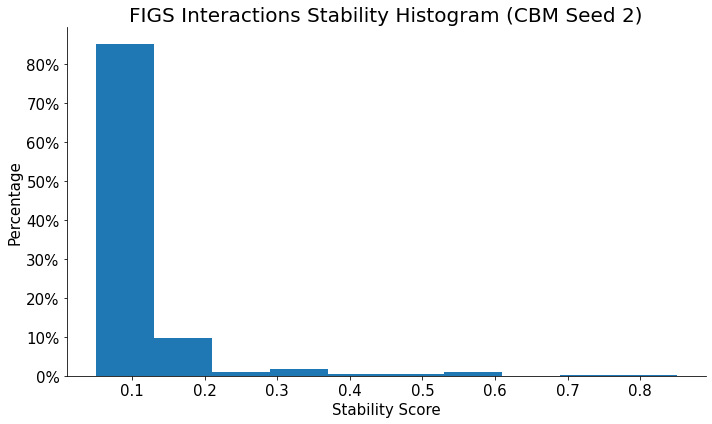

In [40]:
plt.figure(figsize=(10, 6))
plt.hist([x[1]/20 for x in sorted2], weights=np.ones(len(sorted2)) / len(sorted2))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Stability Score')
plt.ylabel('Percentage')
plt.title('FIGS Interactions Stability Histogram (CBM Seed 2)')
plt.tight_layout()
plt.savefig(f'../figures/stability/seed2_hist.png')

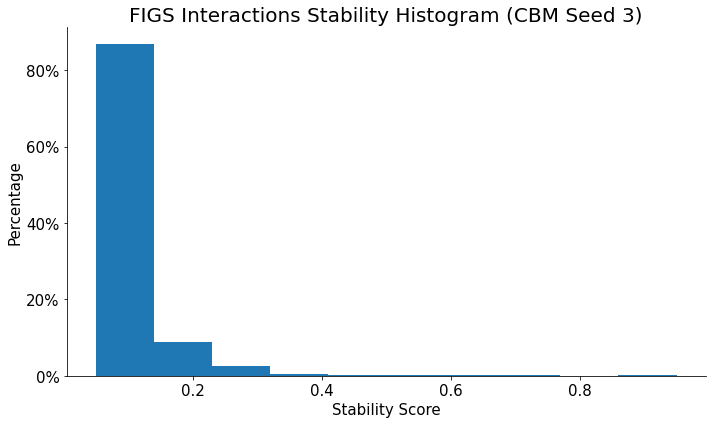

In [41]:
plt.figure(figsize=(10, 6))
plt.hist([x[1]/20 for x in sorted3], weights=np.ones(len(sorted3)) / len(sorted3))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Stability Score')
plt.ylabel('Percentage')
plt.title('FIGS Interactions Stability Histogram (CBM Seed 3)')
plt.tight_layout()
plt.savefig(f'../figures/stability/seed3_hist.png')

(array([629.,  65.,  18.,   4.,   1.,   2.,   2.,   1.,   0.,   2.]),
 array([0.05, 0.14, 0.23, 0.32, 0.41, 0.5 , 0.59, 0.68, 0.77, 0.86, 0.95]),
 <BarContainer object of 10 artists>)

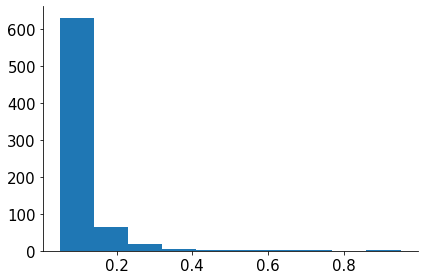

In [20]:
plt.hist([x[1]/20 for x in sorted3])

In [59]:
r.sort_values('mean_edited_cbm_true_accuracy_test', ascending=False).mean_edited_cbm_true_accuracy_test #.mean_edited_distiler_true_accuracy_test #.mean_distiller_true_accuracy_test #.mean_edited_cbm_true_accuracy_test

10    0.840064
12    0.816477
3     0.814866
0     0.809516
1     0.809516
2     0.809516
4     0.809516
7     0.809516
11    0.809516
13    0.809516
14    0.809516
5     0.805834
6     0.805834
8     0.805834
9     0.805834
15    0.803647
Name: mean_edited_cbm_true_accuracy_test, dtype: float64

In [53]:
r[r['X_type'] != 'cluster']['mean_distiller_true_accuracy_trainval']

0     0.966355
1     0.974320
2     0.816065
3     0.899454
4     0.971201
7     0.971201
8     0.890430
9     0.981061
10    0.985071
11    0.983066
12    0.966355
13    0.981061
14    0.772727
15    0.983066
16    0.938336
17    0.773674
18    0.981172
19    0.699978
20    0.926638
21    0.888703
24    0.985071
25    0.976381
27    0.974320
29    0.826705
30    0.973039
31    0.981172
33    0.894942
34    0.762199
36    0.976381
37    0.699086
38    0.773117
39    0.890374
Name: mean_distiller_true_accuracy_trainval, dtype: float64

In [50]:
r[r['X_type'] != 'cluster']['mean_cbm_true_accuracy_test']

0     0.777126
1     0.777126
2     0.777126
3     0.777126
4     0.777126
7     0.777126
8     0.777126
9     0.777126
10    0.777126
11    0.777126
12    0.777126
13    0.777126
14    0.777126
15    0.777126
16    0.777126
17    0.777126
18    0.777126
19    0.777126
20    0.777126
21    0.777126
24    0.777126
25    0.777126
27    0.777126
29    0.777126
30    0.777126
31    0.777126
33    0.777126
34    0.777126
36    0.777126
37    0.777126
38    0.777126
39    0.777126
Name: mean_cbm_true_accuracy_test, dtype: float64

In [25]:
r[r['model_name']=='FTDHydraRegressorCV'].sort_values('mean_edited_distiller_true_accuracy_test', ascending=False).mean_edited_distiller_true_accuracy_test #['mean_edited_distiller_true_accuracy_test'] #['mean_distiller_true_accuracy_test']

3     0.709527
14    0.685997
31    0.683983
26    0.682890
18    0.638879
19    0.624957
6     0.621160
Name: mean_edited_distiller_true_accuracy_test, dtype: float64

In [ ]:
r[['model_name','mean_distiller_cbm_accuracy_trainval', 'mean_edited_distiller_cbm_accuracy_trainval', 'mean_distiller_cbm_accuracy_test', 'mean_edited_distiller_cbm_accuracy_test']]

In [ ]:
r[['model_name','mean_cbm_true_accuracy_trainval', 'mean_edited_cbm_true_accuracy_trainval', 'mean_distiller_true_accuracy_trainval', 'mean_edited_distiller_true_accuracy_trainval',]]

In [ ]:
r[['model_name', 'mean_%_correct_overlap_trainval', 'mean_%_correct_overlap_test', 'mean_edited_%_correct_overlap_trainval', 'mean_edited_%_correct_overlap_test']]